In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Variabilidade
A média nos diz onde um histograma se equilibra. Mas em quase todos os histogramas que vimos, os valores se espalham dos dois lados da média. Quão longe da média eles podem estar? Para responder a essa pergunta, desenvolveremos uma medida de variabilidade em relação à média.

Começaremos descrevendo como calcular a medida. Em seguida, veremos por que é uma boa medida para calcular.

## Aproximação do Tamanho das Deviações da Média
Para simplificar, começaremos nossos cálculos no contexto de uma matriz simples `any_numbers` composta apenas por quatro valores. Como veremos, nosso método se estenderá facilmente a qualquer outra matriz de valores.

In [2]:
any_numbers = make_array(1, 2, 2, 10)

O objetivo é medir aproximadamente quão distantes os números estão de sua média. Para fazer isso, primeiro precisamos da média:

In [3]:
# Passo 1. A média.

mean = np.mean(any_numbers)
mean

3.75

A seguir, vamos descobrir a que distância cada valor está da média. Eles são chamados de *desvios da média*. Um "desvio da média" é apenas um valor menos a média. A tabela `calculation_steps` exibe os resultados .

In [4]:
# Passo 2. Os desvios da média.

deviations = any_numbers - mean
calculation_steps = Table().with_columns(
        'Value', any_numbers,
        'Deviation from Average', deviations
        )
calculation_steps

Value,Deviation from Average
1,-2.75
2,-1.75
2,-1.75
10,6.25


Alguns dos desvios são negativos; correspondem a valores abaixo da média. Desvios positivos correspondem a valores acima da média.

Para calcular aproximadamente o tamanho dos desvios, é natural calcular a média dos desvios. Mas algo interessante acontece quando todos os desvios são somados:

In [5]:
sum(deviations)

0.0

The positive deviations exactly cancel out the negative ones. This is true of all lists of numbers, no matter what the histogram of the list looks like: **the sum of the deviations from average is zero.** 

Como a soma dos desvios é 0, a média dos desvios também será 0:

In [6]:
np.mean(deviations)

0.0

Por causa disso, a média dos desvios não é uma medida útil do tamanho dos desvios. O que realmente queremos saber é aproximadamente quão grandes são os desvios, independentemente de serem positivos ou negativos. para eliminar os sinais dos desvios.

Existem duas maneiras consagradas de perder sinais: o valor absoluto e o quadrado. Acontece que tomar o quadrado constrói uma medida com propriedades extremamente poderosas, algumas das quais estudaremos neste curso.

Então vamos eliminar os sinais elevando ao quadrado todos os desvios. Depois tiraremos a média dos quadrados:

In [7]:
# Etapa 3. Os desvios quadrados da média

squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column(
   'Squared Deviations from Average', squared_deviations
    )
calculation_steps

Value,Deviation from Average,Squared Deviations from Average
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [8]:
# Etapa 4. Variância = desvio quadrático médio da média

variance = np.mean(squared_deviations)
variance

13.1875

**Variância:** O desvio quadrático médio calculado acima é chamado de *variância* dos valores. 

Embora a variância nos dê uma ideia de dispersão, ela não está na mesma escala que a variável original, pois suas unidades são o quadrado do original. Isso torna a interpretação muito difícil. 

Portanto, voltamos à escala original extraindo a raiz quadrada positiva da variância:

In [9]:
# Passo 5.
# Desvio Padrão:      raiz do desvio quadrático médio da média
# Etapas de cálculo: 5    4      3       2             1

sd = variance ** 0.5
sd

3.6314597615834874

## Desvio Padrão

A quantidade que acabamos de calcular é chamada de *desvio padrão* da lista, e é abreviada como DP. Ele mede aproximadamente quão distantes os números da lista estão de sua média.

**Definição.** O DP de uma lista é definido como a *raiz quadrada da média dos quadrados das deviações da média*. Isso é complicado. Mas se lermos da direita para a esquerda, temos a sequência de passos no cálculo.

**Cálculo.** Os cinco passos descritos acima resultam no DP. Você também pode usar a função ``np.std`` para calcular o DP dos valores em uma matriz:

In [10]:
np.std(any_numbers)

3.6314597615834874

## Trabalhando com o SD

Para ver o que podemos aprender com o SD, vamos passar para um conjunto de dados mais interessante do que `any_numbers`. A tabela `nba13` contém dados sobre os jogadores da National Basketball Association (NBA) em 2013. Para cada jogador, a tabela registra a posição em que o jogador normalmente jogava, sua altura em polegadas, seu peso em libras e sua idade em anos.

In [11]:
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


Aqui está um histograma da altura dos jogadores.

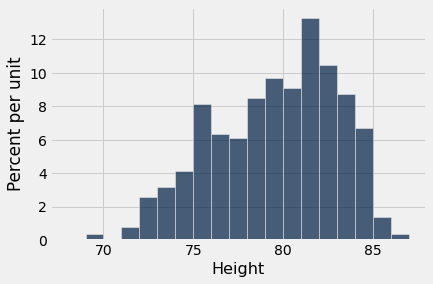

In [12]:
nba13.select('Height').hist(bins=np.arange(68, 88, 1))

Não é nenhuma surpresa que os jogadores da NBA sejam altos! Sua altura média é pouco mais de 79 polegadas (6'7"), cerca de 25 centímetros mais alta do que a altura média dos homens nos Estados Unidos.

In [13]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.06534653465347

A que distância estão as alturas dos jogadores da média? Isso é medido pelo SD das alturas, que é cerca de 3,45 polegadas.

In [14]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

O imponente centro Hasheem Thabeet do Oklahoma City Thunder era o jogador mais alto, com 87 polegadas de altura.

In [15]:
nba13.sort('Height', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20


Thabeet estava cerca de 20 centímetros acima da altura média.

In [16]:
87 - mean_height

7.934653465346528

Isso é um desvio da média e é cerca de 2,3 vezes o desvio padrão:

In [17]:
(87 - mean_height)/sd_height

2.2995015194397923

Em outras palavras, a altura do jogador mais alto estava cerca de 2,3 SD acima da média.

Com 69 centímetros de altura, Isaiah Thomas foi um dos dois jogadores mais baixos da NBA em 2013. Sua altura estava cerca de 2,9 SD abaixo da média.

In [18]:
nba13.sort('Height').show(3)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30


In [19]:
(69 - mean_height)/sd_height

-2.9169868288775844

O que observamos é que os jogadores mais altos e mais baixos estavam a apenas alguns SDs da altura média. Este é um exemplo de por que o SD é uma medida útil de propagação. Não importa o formato do histograma, a média e o SD juntos dizem muito sobre onde o histograma está situado na reta numérica.

## Primeira razão principal para medir a dispersão pelo DP

**Declaração informal.** Em todos os conjuntos de dados numéricos, a maior parte das entradas está dentro do intervalo "média $\pm$ alguns DPs".

Por enquanto, resista ao desejo de saber exatamente o que palavras vagas como "maior parte" e "alguns" significam. Nós as tornaremos precisas mais tarde nesta seção. Vamos apenas examinar a declaração no contexto de mais alguns exemplos.

Já vimos que *todas* as alturas dos jogadores da NBA estavam no intervalo "média $\pm$ 3 SDs". 

E as idades? Aqui está um histograma da distribuição, juntamente com a média e o DP das idades.

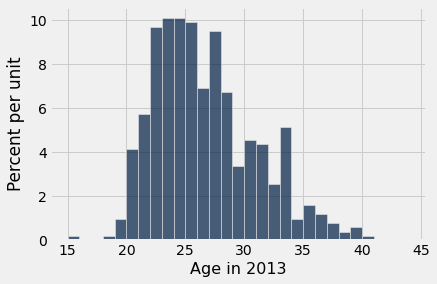

In [20]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [21]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.321200441720307)

A idade média era de pouco mais de 26 anos e o DP era de cerca de 4,3 anos.

A que distância estavam as idades da média? Assim como fizemos com as alturas, vejamos um exemplo.

Juwan Howard era o jogador mais velho, aos 40 anos.

In [22]:
nba13.sort('Age in 2013', descending=True).show(3)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Steve Nash,Guard,75,178,39
Derek Fisher,Guard,73,210,39


A idade de Howard estava cerca de 3,2 SD acima da média.

In [23]:
(40 - mean_age)/sd_age

3.1958482778922357

O que observamos para as alturas e idades é verdadeiro em grande generalidade. Para *todas* as listas, a maior parte das entradas está a não mais do que 2 ou 3 desvios padrão da média.

## Limites de Chebychev
O matemático russo [Pafnuty Chebychev](https://en.wikipedia.org/wiki/Pafnuty_Chebyshev) (1821-1894) provou um resultado que torna nossas afirmações aproximadas precisas.

**Para todas as listas e todos os números $z$, a proporção de entradas que estão no intervalo
"média $\pm z$ SDs" é pelo menos $1 - \frac{1}{z^2}$.**

É importante notar que o resultado fornece um limite inferior, não um valor exato ou uma aproximação.

O que torna o resultado poderoso é que ele é verdadeiro para todas as listas – todas as distribuições, não importa quão irregulares.

Especificamente, ele diz que para cada lista:

- a proporção no intervalo "média $\pm$ 2 SDs" é **pelo menos 1 - 1/4 = 0.75**

- a proporção no intervalo "média $\pm$ 3 SDs" é **pelo menos 1 - 1/9 $\approx$ 0.89**

- a proporção no intervalo "média $\pm$ 4.5 SDs" é **pelo menos 1 - 1/$\boldsymbol{4.5^2}$ $\approx$ 0.95**

Como observamos acima, o resultado de Chebychev fornece um limite inferior, não uma resposta exata ou uma aproximação. Por exemplo, a percentagem de entradas no intervalo "média $\pm ~2$ SDs" pode ser consideravelmente maior que 75%. Mas não pode ser menor.

## Unidades padrão

Nos cálculos acima, a quantidade $z$ mede *unidades padrão*, o número de desvios padrão acima da média.

Alguns valores de unidades padrão são negativos, correspondendo a valores originais abaixo da média. Outros valores de unidades padrão são positivos. Mas, independentemente da aparência da distribuição da lista, os limites de Chebychev implicam que as unidades padrão estarão tipicamente na faixa (-5, 5).

Para converter um valor em unidades padrão, primeiro encontre o quão distante ele está da média e depois compare essa variação com o desvio padrão.

$$
z ~=~ \frac{\mbox{valor }-\mbox{ média}}{\mbox{SD}}
$$

Como veremos, as unidades padrão são frequentemente usadas na análise de dados. Portanto, é útil definir uma função que converta um array de números em unidades padrão.

In [24]:
def standard_units(numbers_array):
    "Converta qualquer array de números em unidades padrão."
    return (numbers_array - np.mean(numbers_array))/np.std(numbers_array)    

## Exemplo
Como vimos em uma seção anterior, a tabela `united` contém uma coluna `Delay` que consiste nos tempos de atraso de partida, em minutos, de mais de milhares de voos da United Airlines no verão de 2015. Criaremos uma nova coluna chamada `Delay (Standard Units)` aplicando a função `standard_units` à coluna de tempos de atraso. Isso nos permite ver todos os tempos de atraso em minutos, bem como seus valores correspondentes em unidades padrão.

In [25]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column(
    'Delay (Standard Units)', standard_units(united.column('Delay'))
)
united

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


As unidades padrão que podemos ver são consistentes com o que esperamos com base nos limites de Chebychev. A maioria é de tamanho bastante pequeno; apenas uma está acima de 6.

Mas algo bastante alarmante acontece quando classificamos os tempos de atraso do maior para o menor. As unidades padrão que podemos ver são extremamente altas!

In [26]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay (Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


O que isso mostra é que é possível que os dados estejam muitos SDs acima da média (e que os voos tenham atrasos de quase 10 horas). O maior valor de atraso é superior a 14 em unidades padrão. 

No entanto, a proporção desses valores extremos é pequena, e os limites de Chebychev ainda são verdadeiros. Por exemplo, vamos calcular a porcentagem de tempos de atraso que estão no intervalo "media $\pm$ 3 SDs". Isso é o mesmo que a porcentagem de vezes em que as unidades padrão estão no intervalo (-3, 3). Isso é cerca de 98%, conforme calculado abaixo, consistente com o limite de Chebychev de "pelo menos 89%".

In [27]:
within_3_sd = united.where('Delay (Standard Units)', are.between(-3, 3))
within_3_sd.num_rows/united.num_rows

0.9790235081374322

O histograma dos tempos de atraso é mostrado abaixo, com o eixo horizontal em unidades padrão. Pela tabela acima, a cauda direita continua até $z=14,27$ unidades padrão (580 minutos). A área do histograma fora do intervalo $z=-3$ a $z=3$ é cerca de 2%, reunidos em pequenos pedaços que são praticamente invisíveis no histograma.

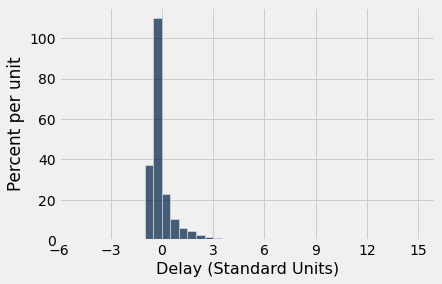

In [28]:
united.hist('Delay (Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));